In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('./listings.csv')
calendar = pd.read_csv('./calendar.csv')

<h2>Question 1: How have price and availablity changed over time, and what time of year has the highest price?</h2>

First I will take a look at the calendar data.

In [3]:
print(calendar.dtypes)
calendar.head()

listing_id     int64
date          object
available     object
price         object
dtype: object


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


Since I want to know how the price is changing over time, I will drop rows which do not display price. I could also impute the price, but because I will not be building a model for this question it is not necessary. Also, I want to graph the price, and I can see the price is dtype object, so I will convert to integer.

In [4]:
cdf = calendar.copy()
cdf.dropna(subset=['price'],inplace=True)
cdf['price'] = cdf['price'].map(lambda p: int(p[1:-3].replace(",", "")))
cdf.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,65
366,3075044,2017-08-21,t,65
367,3075044,2017-08-20,t,65
368,3075044,2017-08-19,t,75
369,3075044,2017-08-18,t,75


Also need to convert the date to a datetime type for pretty graphing.

In [5]:
cdf['date'] = pd.to_datetime(cdf['date'])
print(cdf.dtypes)

listing_id             int64
date          datetime64[ns]
available             object
price                  int64
dtype: object


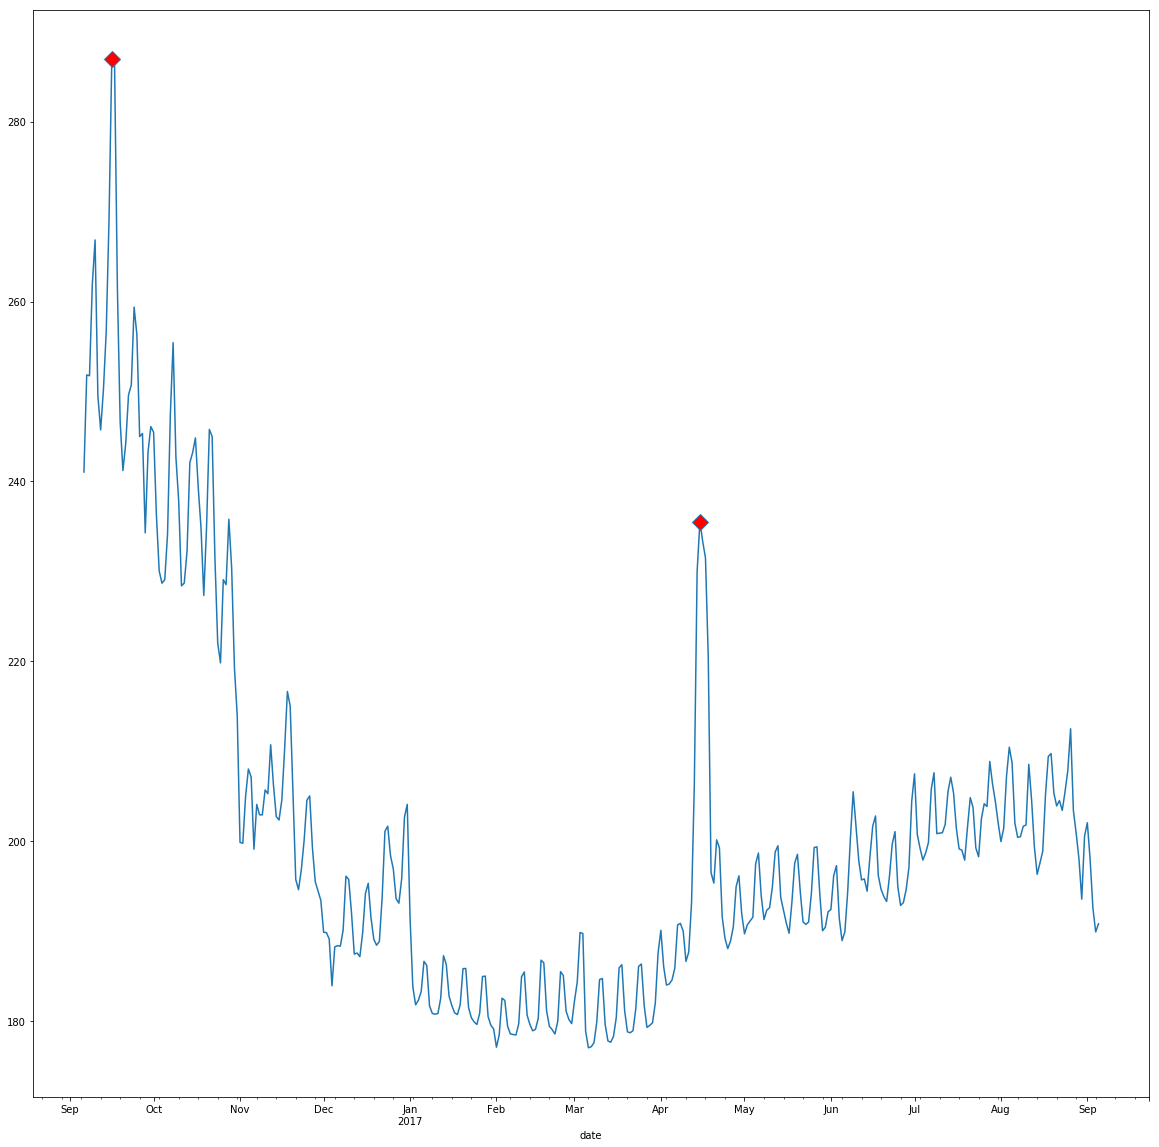

In [6]:
# Group data by date and take the mean of the price by date for graph
meanprice = cdf.groupby(['date'])['price'].mean()
meanprice.plot(figsize=(20,20), markevery=[10,221], marker="D", markersize=12, markerfacecolor='red');

From these results, we can see the Airbnb prices have come down a lot over the past year on average, however there was a large spike in mid April of 2017

In [7]:
# use index 116 as dividing point because it is last day of 2016
print(meanprice.index[116])

print("Mean price for 2016 data: " + str(meanprice[0:116].mean()))
print("Mean price for September 16th: " + str(meanprice[10].mean()))
print("Mean price for 2017 data: " + str(meanprice[117:].mean()))
print("Mean price for April 15th: " + str(meanprice[221].mean()))

2016-12-31 00:00:00
Mean price for 2016 data: 219.53959385064348
Mean price for September 16th: 286.9219765929779
Mean price for 2017 data: 192.55892696376452
Mean price for April 15th: 235.50161812297733


So comparing the last four months of 2016 to the first 8 months of 2017 we can see the price has on average reduced by almost $30.
Another interesting feature of the data is the large spikes in mean price mid-September of 2016 and mid-April of 2017. Let's take a look
at the availability feature to see if there is a corresponding trend.

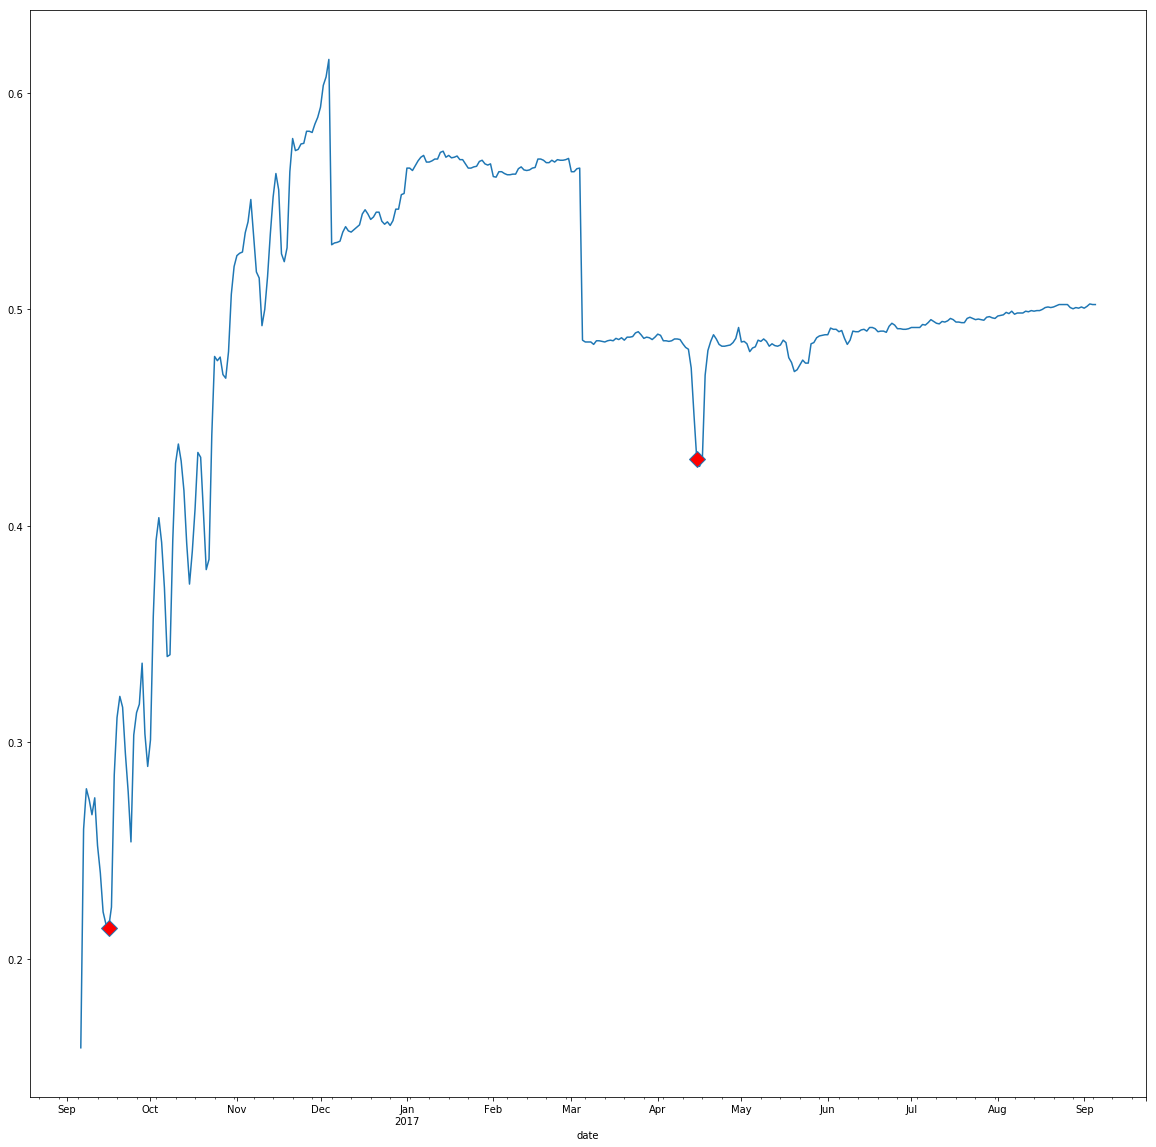

In [9]:
c2 = calendar.copy()
c2['available'] = c2['available'].replace("f",0)
c2['available'] = c2['available'].replace("t",1)
c2['date'] = pd.to_datetime(c2['date'])
meanavail = c2.groupby(['date'])['available'].mean()
meanavail.plot(figsize=(20,20), markevery=[10,221], marker="D", markersize=12, markerfacecolor='red');

What we can see from this graph is that the price and availablity are nearly inverses of each other. 
Beginning early March 2017, Airbnb was able to stabilize and increase the availability to around 0.5 ratio. Probabaly overall low availability contributed to the higher prices in 2016,  and the spike in price mid-April makes sense as well because there was a drop in availability during this time. 

The Boston marathon was on April 16th 2017, so this probably accounts for the increased prices and reduced availablity around that time.